In [2]:
pip install FinMind

     |████████████████████████████████| 51kB 2.0MB/s 
     |████████████████████████████████| 6.3MB 5.6MB/s 
     |████████████████████████████████| 143kB 39.9MB/s 
     |████████████████████████████████| 788kB 47.2MB/s 
     |████████████████████████████████| 798kB 48.5MB/s 
     |████████████████████████████████| 286kB 48.8MB/s 
     |████████████████████████████████| 8.6MB 23.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 1.3MB 32.3MB/s 
     |████████████████████████████████| 133kB 44.0MB/s 
     |████████████████████████████████| 368kB 30.9MB/s 
     |████████████████████████████████| 143kB 45.5MB/s 
     |████████████████████████████████| 296kB 39.1MB/s 
  Created wheel for ta: filename=ta-0.5.25-cp37-none-any.whl size=24879 sha256=a444e38f3d84d9aa51b32c57ac844f2fc0baeee7d207fd645d5e1c56b5d6d2ed
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta
ERRO

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [55]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanFuturesDaily",
    "data_id": "TX",
    "start_date": "2021-05-01",
    "end_date": "2021-05-29",
    "token": "", # 參考登入，獲取金鑰
}
resp = requests.get(url, params=parameter)
data = resp.json()
data = pd.DataFrame(data["data"])
print(data.head())
data = data.set_index("date")
print(data)

         date futures_id  ... open_interest  trading_session
0  2021-05-03         TX  ...         81995         position
1  2021-05-03         TX  ...             0     after_market
2  2021-05-03         TX  ...          9072         position
3  2021-05-03         TX  ...             0     after_market
4  2021-05-03         TX  ...           271         position

[5 rows x 13 columns]
           futures_id contract_date  ...  open_interest  trading_session
date                                 ...                                
2021-05-03         TX        202105  ...          81995         position
2021-05-03         TX        202105  ...              0     after_market
2021-05-03         TX        202106  ...           9072         position
2021-05-03         TX        202106  ...              0     after_market
2021-05-03         TX        202107  ...            271         position
...               ...           ...  ...            ...              ...
2021-05-28         TX      

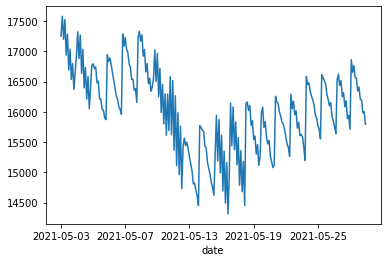

<Figure size 7200x3600 with 0 Axes>

In [56]:
#劃出趨勢圖
def get_picture(data = data):
  data['close'].plot()
  plt.figure(figsize=(100, 50))
  plt.show()
get_picture(data)

In [57]:
#轉換序列
def processing(data=data, long=11):
  data["close"] = data["close"].astype(float)
  sample_size = len(data) - long + 1
  print("共有{}個樣本".format(sample_size))
  
  data_sample = []
  for i in range(sample_size):
    data_sample.append(data["close"][i:i+long])
  data_sample = np.array(data_sample)
  return data_sample


In [58]:
def stock_LSTM(input_data=None):
  scaler_x = MinMaxScaler()
  scaler_y = MinMaxScaler()
  x = input_data[:, :-1]
  y = input_data[:, -1]
  x = scaler_x.fit_transform(x)
  y = scaler_y.fit_transform(np.reshape(y, (len(y), 1)))
  spilt = int(len(y) * 0.8)
  x_train = x[:spilt]
  x_test = x[spilt:]
  y_train = y[:spilt]
  y_test = y[spilt:]
  print(x_train.shape[0], x_train.shape[1])
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  model = Sequential()
  model.add(LSTM(50, input_shape=(x_train.shape[1],1), return_sequences=True))
  model.add(LSTM(100))
  model.add(Dense(1, activation="linear"))
  model.compile(loss="mse", optimizer="rmsprop")
  print("訓練中...")
  history = model.fit(x_train, y_train, batch_size=8, epochs=300, validation_split=0.1)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

  #劃出 train_loss
  ax1.set_title("train_loss")
  ax1.set_ylabel("loss")
  ax1.set_xlabel("Epoch")
  ax1.plot(history.history["loss"])

  predict = model.predict(x_test)
  y_test = scaler_y.inverse_transform(np.reshape(y_test, (len(y_test), 1)))
  predict = scaler_y.inverse_transform(predict)

  #劃出預測圖
  ax2.set_title("stock predict result")
  ax2.set_ylabel("price")
  ax2.set_xlabel("time")
  ax2.plot(predict, "g:")
  ax2.plot(y_test, "r-")
  fig.show()

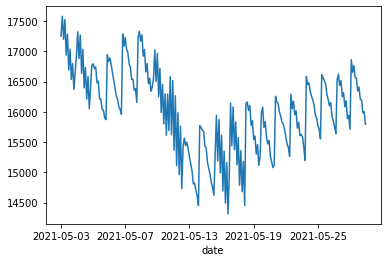

<Figure size 7200x3600 with 0 Axes>

共有228個樣本
182 10
訓練中...
Epoch 1/300
21/21 [==============================] - 5s 60ms/step - loss: 0.1188 - val_loss: 0.0215
Epoch 2/300
21/21 [==============================] - 0s 14ms/step - loss: 0.0365 - val_loss: 0.0184
Epoch 3/300
21/21 [==============================] - 0s 14ms/step - loss: 0.0304 - val_loss: 0.0207
Epoch 4/300
21/21 [==============================] - 0s 14ms/step - loss: 0.0338 - val_loss: 0.0190
Epoch 5/300
21/21 [==============================] - 0s 14ms/step - loss: 0.0291 - val_loss: 0.0305
Epoch 6/300
21/21 [==============================] - 0s 14ms/step - loss: 0.0336 - val_loss: 0.0165
Epoch 7/300
21/21 [==============================] - 0s 15ms/step - loss: 0.0288 - val_loss: 0.0175
Epoch 8/300
21/21 [==============================] - 0s 14ms/step - loss: 0.0295 - val_loss: 0.0172
Epoch 9/300
21/21 [==============================] - 0s 14ms/step - loss: 0.0285 - val_loss: 0.0381
Epoch 10/300
21/21 [==============================] - 0s 14ms/step - loss: 0.

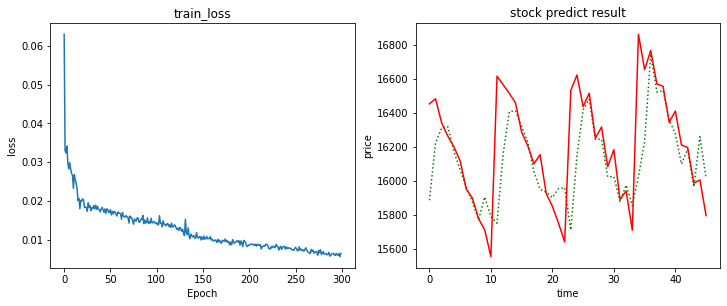

In [59]:
get_picture()
sam = processing(data)
stock_LSTM(sam)